# Setup

In [3]:
# Python 3.12 is required for this. Use following commands to install the setup:

#!python3.12 -m venv .venv
#!.venv\scripts\activate

#!python -m pip install matplotlib

import numpy as np
import keras
from keras import layers

In its original form, the image data is in a 2D form of rows and columns (28, 28), while the ConvNet layers expect 3D form, including the depth dimension. Therefore, we reshape the tensors to have the form (28, 28, 1) appropriate for black and white images.

In addition, all the entries of the tensors are normalized by dividing by 255 as before.

# Prepare data

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert multi class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


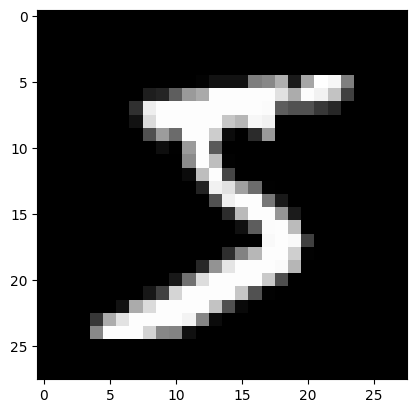

True label = 5


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_number = 0
image = x_train[sample_number]
plt.imshow(image, cmap='gray')
plt.show()

print('True label =',np.argmax(y_train[sample_number]))

# Build the model
The model contains two convolutional layers, with two pooling layers in between them, then flatten layer, dropout layer, and finallu a dense top that performs the actual classification.

Conv2D Layer:

layers.Conv2D(32, kernel_size=(3, 3), activation="relu"):

    This applies 32 convolutional filters, each of size 3×3, to the input image.

    The convolution operation detects features such as edges or patterns in the input.

    The activation function "ReLU" introduces non-linearity, helping the model learn complex patterns.

    The output of this layer is a feature map with 32 channels.

MaxPooling2D Layer:

layers.MaxPooling2D(pool_size=(2, 2)):

    Applies a 2×2 pooling operation to the output of the Conv2D layer.

    Divides the feature map into 2×2 non-overlapping regions and keeps the maximum value from each region.

    Reduces the spatial dimensions (height and width) by half, while keeping the number of channels the same (32 channels from the first Conv2D layer) = keeping the main 
    features





Flatten layer:

layers.Flatten()
    to convert the multi-dimensional feature maps outputted by the convolutional and pooling layers into a 1D vector.

Dropout:

layers.Dropout(0.5):
    During training, this layer randomly sets 50% of its input units (as specified by 0.5) to 0 at each update step in order to prevent overfitting.

Dense:

layers.Dense(num_classes, activation="softmax"):

    num_classes: Specifies the number of output neurons, equal to the number of target classes in the classification problem.

    activation="softmax": Applies the softmax activation function, which converts the outputs into probabilities for each class. The sum of these probabilities equals 1, 
    making it suitable for multi-class classification.

Softmax: all outputs from 0 to 9 are between 0 and 1, and their sum is 1.

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), # 5*5*24=1600
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8884 - loss: 0.3648 - val_accuracy: 0.9757 - val_loss: 0.0864
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9652 - loss: 0.1129 - val_accuracy: 0.9842 - val_loss: 0.0593
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0866 - val_accuracy: 0.9890 - val_loss: 0.0455
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9774 - loss: 0.0720 - val_accuracy: 0.9893 - val_loss: 0.0393
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9803 - loss: 0.0633 - val_accuracy: 0.9903 - val_loss: 0.0362
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9832 - loss: 0.0533 - val_accuracy: 0.9900 - val_loss: 0.0344
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0490 - val_accuracy: 0.

# Evaluate the trained model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)